In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

In [107]:
df = pd.read_csv('global_power_plant_database.csv',delimiter=';', encoding='UTF-8')

In [108]:
df

,country,name,capacity_mw,latitude,longitude,primary_fuel,estimated_generation_gwh
0,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,33.00,32.3220,65.1190,Hydro,NaN
1,Afghanistan,Mahipar Hydroelectric Power Plant Afghanistan,66.00,34.5560,69.4787,Hydro,NaN
2,Afghanistan,Naghlu Dam Hydroelectric Power Plant Afghanistan,100.00,34.6410,69.7170,Hydro,NaN
3,Afghanistan,Nangarhar (Darunta) Hydroelectric Power Plant ...,11.55,34.4847,70.3633,Hydro,NaN
4,Afghanistan,Northwest Kabul Power Plant Afghanistan,42.00,34.5638,69.1134,Gas,NaN
...,...,...,...,...,...,...,...
29905,Zambia,Ndola,50.00,-12.9667,28.6333,Oil,120.872642
29906,Zambia,Nkana,20.00,-12.8167,28.2000,Oil,48.349057
29907,Zambia,Victoria Falls,108.00,-17.9167,25.8500,Hydro,702.100000
29908,Zimbabwe,Hwange Coal Power Plant Zimbabwe,920.00,-18.3835,26.4700,Coal,4397.000000


In [109]:
df = df.drop_duplicates(['country','name'])

In [110]:
df = df.dropna()

среднее значение

In [111]:
# мощности электростанции
mean_capacity_mw = df['capacity_mw'].sum() / df['capacity_mw'].count()
mean_capacity_mw

187.62003780215542

In [112]:
df['capacity_mw'].mean()

187.62003780215542

In [113]:
#выработка электричества
mean_estimated_generation_gwh = df['estimated_generation_gwh'].sum() / df['estimated_generation_gwh'].count()
mean_estimated_generation_gwh

850.6071399525041

In [114]:
df['estimated_generation_gwh'].mean()

850.6071399525041

среднее квадратичное отклонение 

In [115]:
#мощности электростанции
capacity_mw_std = np.sqrt(((df['capacity_mw'] - df['capacity_mw'].mean())**2).sum() / df['capacity_mw'].count())
capacity_mw_std

552.6084625096779

In [116]:
df['capacity_mw'].std(ddof=0)

552.6084625096779

In [117]:
#выработка электричества
df['estimated_generation_gwh'].std(ddof=0)

4084.323902883603

Рассчитаем несмещенную дисперсию

In [118]:
#мощности электростанции
capacity_mw_variance2 = ((df['capacity_mw'] - df['capacity_mw'].mean())**2).sum() / (df['capacity_mw'].count() - 1)
capacity_mw_variance2

305390.2992218143

In [119]:
df['capacity_mw'].var(ddof=1)

305390.2992218143

In [120]:
#выработка электричества
df['estimated_generation_gwh'].var(ddof=1)

16682476.69961467

Рассчитаем смещенную дисперсию

In [121]:
#мощности электростанции
df['capacity_mw'].var(ddof=0)

305376.1128373101

In [122]:
#выработка электричества
df['estimated_generation_gwh'].var(ddof=0)

16681701.743666345

In [123]:
# мода и медиана(второй квартиль) мощности электростанции
target_median = df['capacity_mw'].median()
target_mode = df['capacity_mw'].mode()[0]

target_mode, target_median

(5.0, 19.5)

In [124]:
# мода и медиана(второй квартиль) выработки электричества
target_median = df['estimated_generation_gwh'].median()
target_mode = df['estimated_generation_gwh'].mode()[0]

target_mode, target_median

(149.98564434532332, 54.245544821610714)

In [125]:
#первый квартиль мощности электростанции
np.percentile(df.capacity_mw, 25)

5.0

In [126]:
#первый квартиль выработки электричества
np.percentile(df.estimated_generation_gwh, 25)

10.117934005282574

In [127]:
#третий квартиль мощности электростанции
np.percentile(df.capacity_mw, 75)

94.2

In [128]:
#третий квартиль выработки электричества
np.percentile(df.estimated_generation_gwh, 75)

345.7477936533945

визуализация при помощи гистограммы

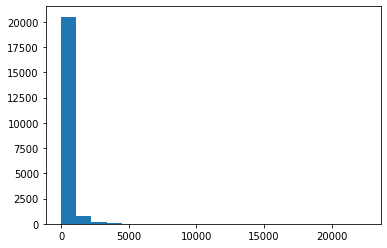

In [129]:
plt.hist(df['capacity_mw'], bins = 40)
plt.title('Гистограмма мощность электростанций')
plt.xlabel('мощность электростанции в гигаваттах')
plt.ylabel('Количество')
plt.show()

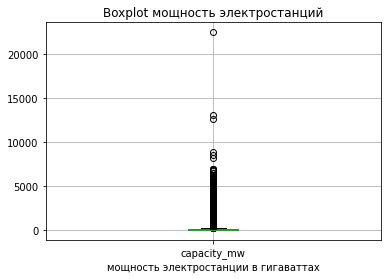

In [133]:
boxplot  = df.boxplot(column = ['capacity_mw'])
plt.title('Boxplot мощность электростанций')
plt.xlabel('мощность электростанции в гигаваттах')
plt.show()

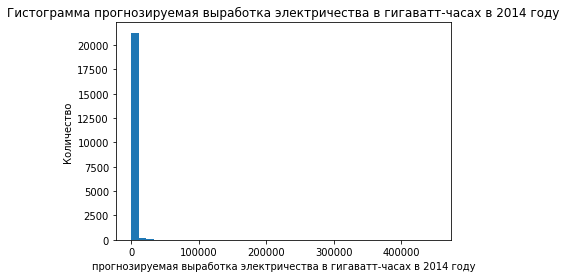

In [134]:
plt.hist(df['estimated_generation_gwh'], bins = 40)
plt.title('Гистограмма прогнозируемая выработка электричества в гигаватт-часах в 2014 году')
plt.xlabel('прогнозируемая выработка электричества в гигаватт-часах в 2014 году')
plt.ylabel('Количество')
plt.show()

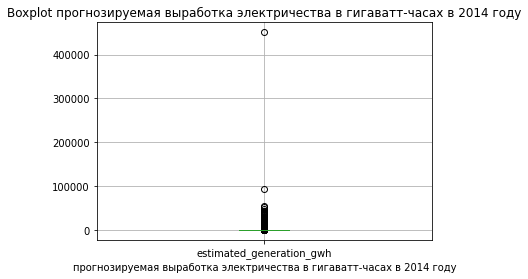

In [135]:
boxplot  = df.boxplot(column = ['estimated_generation_gwh'])
plt.title('прогнозируемая выработка электричества в гигаватт-часах в 2014 году')
plt.xlabel('прогнозируемая выработка электричества в гигаватт-часах в 2014 году')
plt.show()